In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('advertising.csv')

In [65]:
df.head()

,No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [66]:
df.columns

Index(['No', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [67]:
df.dtypes

No             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [68]:
df.shape

(200, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [70]:
df.describe()

,No,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


skewness is present in Tv,radio,newspaper and sales field.outliers are present in all fields.

In [71]:
df.isnull()

,No,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [72]:
df.isnull().sum()

No           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [73]:
df.drop('No',axis=1,inplace=True)

In [74]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [75]:
df_cor=df.corr()

In [76]:
df_cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


sales is highly correlate with TV and least correlate with newspaper.

<AxesSubplot:>

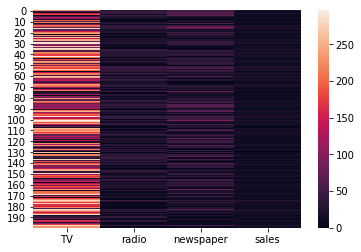

In [77]:
sns.heatmap(df)

No null values.

<AxesSubplot:>

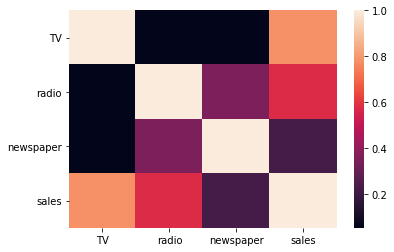

In [78]:
sns.heatmap(df_cor)

<AxesSubplot:>

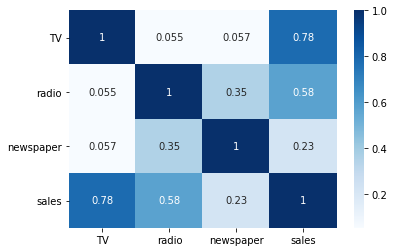

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cor,cmap='Blues',annot=True)

<AxesSubplot:>

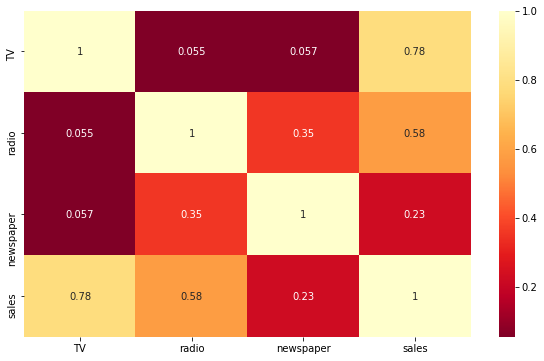

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

In [81]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:xlabel='TV', ylabel='Density'>

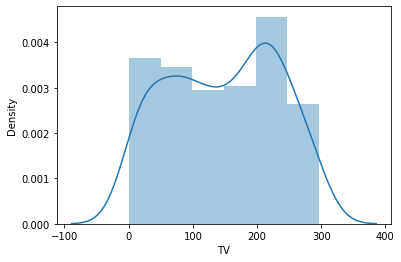

In [82]:
sns.distplot(df['TV'])

 No skewness present.

<AxesSubplot:xlabel='radio', ylabel='Density'>

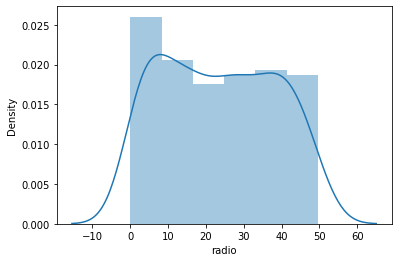

In [83]:
sns.distplot(df['radio'])

No skewness present.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

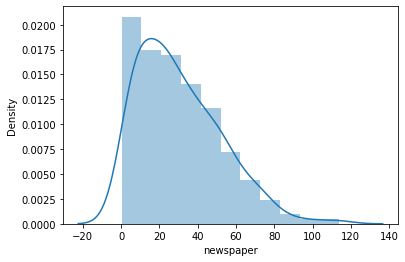

In [84]:
sns.distplot(df['newspaper'])

skewness present.

<AxesSubplot:xlabel='sales', ylabel='Density'>

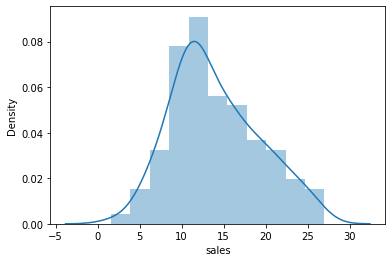

In [85]:
sns.distplot(df['sales'])

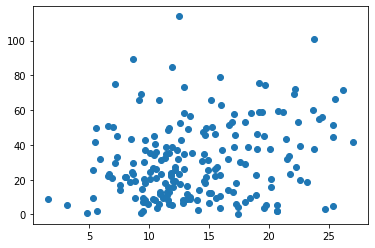

In [86]:
plt.scatter(df['sales'],df['newspaper'])

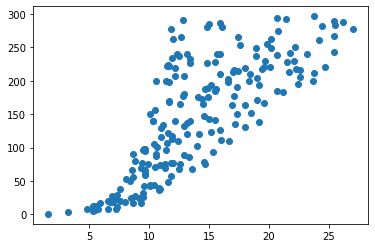

In [87]:
plt.scatter(df['sales'],df['TV'])

A positive relationship shows between sales and TV.

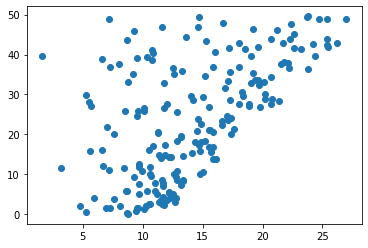

In [88]:
plt.scatter(df['sales'],df['radio'])

A positive relationship shows between sales and radio.

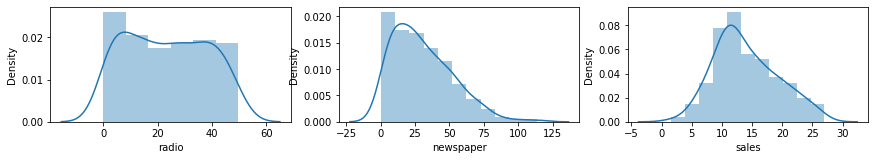

In [89]:
collist=df.columns.values
ncol=5
nrows=10
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

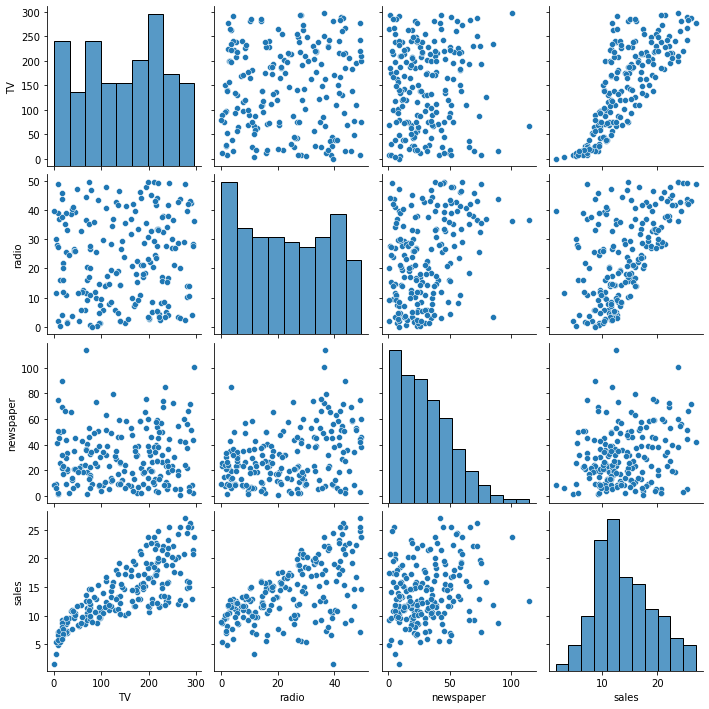

In [90]:
sns.pairplot(df)

In [91]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

skewness are present in newspaper.

In [92]:
df['newspaper']=np.log1p(df['newspaper'])

In [93]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

<AxesSubplot:>

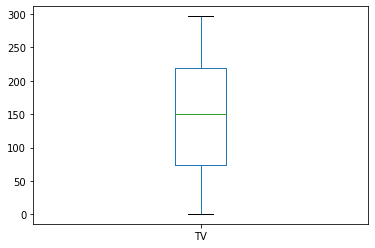

In [94]:
df['TV'].plot.box()

NO outliers are present.

<AxesSubplot:>

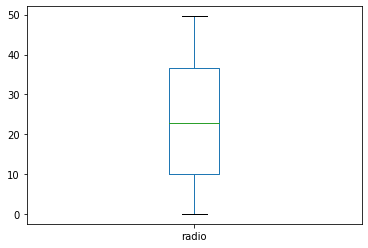

In [95]:
df['radio'].plot.box()

no outliers are present.

<AxesSubplot:>

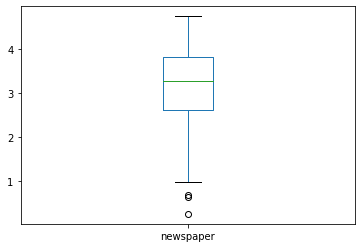

In [96]:
df['newspaper'].plot.box()

outliers are present

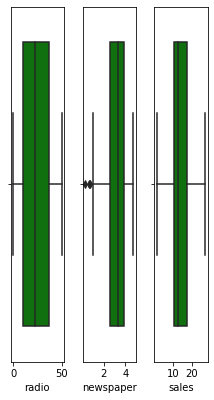

In [97]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [98]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [99]:
z[33][2]

3.344519569817156

In [100]:
df_new=df[(z<3).all(axis=1)]

In [101]:
df_new.shape

(199, 4)

In [102]:
df.shape

(200, 4)

In [103]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9


In [104]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [105]:
x

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


In [106]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 199, dtype: float64

In [107]:
def getScore(m):
    max_score=0
    max_i=0
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        rscore=r2_score(y_test,pred)
        if(rscore>max_score):
            max_score=rscore
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


In [112]:
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)
lr=LinearRegression()
getScore(lr)

max score 0.9402925960599822
max i 151
mean absolute error: 1.278593802178628
mean squared error 3.6127488342921583
Root Mean Squared Error: 1.9007232397937788


In [109]:
lr.coef_

array([ 0.04535151,  0.1866112 , -0.17948405])

In [110]:
lr.intercept_

3.6246596336745167

# Regularization :: L1 and L2 Regularization¶

In [113]:
from sklearn.linear_model  import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9100609121315156

In [115]:
ls.coef_

array([ 0.04429495,  0.19253677, -0.03530624])

In [120]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9100609127066704

In [121]:
rd.coef_

array([ 0.04429507,  0.1925394 , -0.03545539])

In [122]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.910060912551703


array([ 0.04429501,  0.192538  , -0.03537802])

# cross validation

In [126]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.88019294 0.87656059 0.91793508 0.90739574 0.93620958 0.79698336
 0.89585929 0.90644934]
0.8896982398468203 0.03945152156285094


# Ensemble Techniques

In [128]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.9709464748409984
0.8255641212121195


In [130]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(r2_score(y_test,predab))
print(mean_squared_error(y_test,predab))

0.9517474450744382
1.3711099732425667


# Saving the model

In [131]:
import joblib
joblib.dump(lr,'lrfile.obj')

['lrfile.obj']

In [133]:
file=joblib.load('lrfile.obj')

In [134]:
file.predict(x_test)

array([12.86972882,  9.91814653, 19.07691605, 11.50693717, 14.61264303,
       10.35326681, 16.02705948,  7.12557268,  7.88733515, 13.40377999,
        9.43510079, 23.05134696, 11.74772225,  5.56390633, 23.1136689 ,
       20.3724798 , 12.11570807, 18.29583677, 10.66346994,  9.14226039,
       20.35089722, 12.20685495, 15.1983717 , 10.81164394, 12.89258085,
       13.72702283, 20.79489366, 16.34439259, 12.21437001, 14.22636403,
       17.55143015,  8.8935004 , 21.92419426, 21.04385826, 17.06676822,
       12.28905228, 21.78450943,  6.15735174, 16.44573072, 13.43249069,
        6.74342656, 20.02411342, 15.29330289, 14.38475029, 14.20510488,
       13.94104259, 14.2888495 , 10.49967155,  8.52694698,  9.02891583,
        6.48613095, 10.63839876,  6.19657015, 14.82838916,  8.7148401 ,
       12.61466427, 20.6720734 ,  9.9786614 , 13.91950716, 14.34220653,
       10.45789132,  4.56870429, 23.01090227, 15.13963474, 16.2118495 ,
       19.97664492])